In [49]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [50]:
# Load the Student Performance Data Set

## Load the Student Performance Data Set
Count the Number of Rows = 25000, Check for Empty Cells - there are none


In [51]:
# Importing necessary libraries
import pandas as pd
file_path = '/content/drive/MyDrive/Colab Notebooks/DataScience102_Project/Student_Performance.csv'
# Load the dataset
data = pd.read_csv(file_path)

# Count the total number of rows in the dataset
total_rows = data.shape[0]

print(f'Total number of rows: {total_rows}\n\n')
print(data.head(5))

# Calculate missing values for all columns
print("\nChecking for missing values:")
missing_values = data.isnull().sum()
print('\nMissing values per column:')
print(missing_values)



Total number of rows: 25000


   student_id  age  gender school_type parent_education  study_hours  \
0           1   14    male      public    post graduate          3.1   
1           2   18  female      public         graduate          3.7   
2           3   17  female     private    post graduate          7.9   
3           4   16   other      public      high school          1.1   
4           5   16  female      public      high school          1.3   

   attendance_percentage internet_access travel_time extra_activities  \
0                   84.3             yes     <15 min              yes   
1                   87.8             yes     >60 min               no   
2                   65.5              no     <15 min               no   
3                   58.1              no   15-30 min               no   
4                   61.0             yes   30-60 min              yes   

  study_method  math_score  science_score  english_score  overall_score  \
0        notes        4

###Remove duplicate rows
There were 10000 duplicate rows.  They have been removed.

In [52]:
#### Identify Duplicate Rows ####
print("\nChecking for duplicates:")
print(f"Number of duplicate rows: {data.duplicated().sum()}")


Checking for duplicates:
Number of duplicate rows: 10000


Let's first inspect the duplicated rows. The `duplicated(keep=False)` method will mark all occurrences of duplicated rows as `True`, allowing us to see all instances of the duplicates.

In [53]:
duplicated_rows = data[data.duplicated(keep=False)].sort_values(by=list(data.columns))
display(duplicated_rows.head(10))

,student_id,age,gender,school_type,parent_education,study_hours,attendance_percentage,internet_access,travel_time,extra_activities,study_method,math_score,science_score,english_score,overall_score,final_grade
1,2,18,female,public,graduate,3.7,87.8,yes,>60 min,no,textbook,57.6,68.8,64.8,61.3,d
17372,2,18,female,public,graduate,3.7,87.8,yes,>60 min,no,textbook,57.6,68.8,64.8,61.3,d
17524,2,18,female,public,graduate,3.7,87.8,yes,>60 min,no,textbook,57.6,68.8,64.8,61.3,d
23867,2,18,female,public,graduate,3.7,87.8,yes,>60 min,no,textbook,57.6,68.8,64.8,61.3,d
2,3,17,female,private,post graduate,7.9,65.5,no,<15 min,no,notes,84.8,95.0,79.2,89.6,b
21076,3,17,female,private,post graduate,7.9,65.5,no,<15 min,no,notes,84.8,95.0,79.2,89.6,b
4,5,16,female,public,high school,1.3,61.0,yes,30-60 min,yes,group study,8.9,32.7,30.0,25.4,f
15557,5,16,female,public,high school,1.3,61.0,yes,30-60 min,yes,group study,8.9,32.7,30.0,25.4,f
24422,5,16,female,public,high school,1.3,61.0,yes,30-60 min,yes,group study,8.9,32.7,30.0,25.4,f
5,6,19,male,public,no formal,3.8,69.6,yes,>60 min,yes,coaching,51.5,78.3,63.9,63.5,d


Now, let's see which `student_id` values are most frequently duplicated. This can help identify if certain students have multiple identical entries.

In [54]:
duplicated_student_ids = duplicated_rows['student_id'].value_counts()
display(duplicated_student_ids.head(10))

,count
student_id,
4781,7
4525,6
13396,6
10349,6
9766,6
9436,6
11619,6
3073,6
14821,6


In [55]:
filtered_data = data[data['student_id'] == 4781]
display(filtered_data)

,student_id,age,gender,school_type,parent_education,study_hours,attendance_percentage,internet_access,travel_time,extra_activities,study_method,math_score,science_score,english_score,overall_score,final_grade
4780,4781,19,male,public,diploma,5.8,55.3,yes,>60 min,yes,textbook,65.6,79.8,82.0,68.4,d
15517,4781,19,male,public,diploma,5.8,55.3,yes,>60 min,yes,textbook,65.6,79.8,82.0,68.4,d
16009,4781,19,male,public,diploma,5.8,55.3,yes,>60 min,yes,textbook,65.6,79.8,82.0,68.4,d
17445,4781,19,male,public,diploma,5.8,55.3,yes,>60 min,yes,textbook,65.6,79.8,82.0,68.4,d
21062,4781,19,male,public,diploma,5.8,55.3,yes,>60 min,yes,textbook,65.6,79.8,82.0,68.4,d
22272,4781,19,male,public,diploma,5.8,55.3,yes,>60 min,yes,textbook,65.6,79.8,82.0,68.4,d
22832,4781,19,male,public,diploma,5.8,55.3,yes,>60 min,yes,textbook,65.6,79.8,82.0,68.4,d


In [56]:
#remove duplicate rows
data = data.drop_duplicates()
print('The total number of rows after removing duplicate rows is ', data.shape[0])


The total number of rows after removing duplicate rows is  15000


###Identify Unique Values of the Categorical Variables. Verify Quantitatative Variable values.

In [57]:
unique_genders = data['gender'].unique()
display(unique_genders)

array(['male', 'female', 'other'], dtype=object)

In [58]:
num_unique_student_ids = data['student_id'].nunique()
print(f"Number of unique student IDs: {num_unique_student_ids}")

Number of unique student IDs: 15000


In [59]:
for column in ['gender', 'school_type','parent_education','internet_access',
               'travel_time','extra_activities', 'study_method', 'final_grade']:
    unique_values = data[column].unique()
    print(f"Unique values for column '{column}':")
    print(unique_values)
    print("\n")

# Check if all values are of float type
for column in ['age','study_hours','attendance_percentage','math_score',
               'science_score', 'english_score','overall_score']:
    # Check if all values are of float type
    all_are_floats = data[column].apply(lambda x: isinstance(x, (float, int))).all()
    print(f"Are all values for column '{column}':floats (or integers, which can be implicitly converted to floats): {all_are_floats}")
    print("\n")


Unique values for column 'gender':
['male' 'female' 'other']


Unique values for column 'school_type':
['public' 'private']


Unique values for column 'parent_education':
['post graduate' 'graduate' 'high school' 'no formal' 'diploma' 'phd']


Unique values for column 'internet_access':
['yes' 'no']


Unique values for column 'travel_time':
['<15 min' '>60 min' '15-30 min' '30-60 min']


Unique values for column 'extra_activities':
['yes' 'no']


Unique values for column 'study_method':
['notes' 'textbook' 'group study' 'coaching' 'mixed' 'online videos']


Unique values for column 'final_grade':
['e' 'd' 'b' 'f' 'c' 'a']


Are all values for column 'age':floats (or integers, which can be implicitly converted to floats): True


Are all values for column 'study_hours':floats (or integers, which can be implicitly converted to floats): True


Are all values for column 'attendance_percentage':floats (or integers, which can be implicitly converted to floats): True


Are all values for colum

###Univariate Analysis of Categorical Variables


--- Univariate Analysis for Categorical Variables ---

Value Counts for 'gender':
gender
other     5042
male      4979
female    4979
Name: count, dtype: int64

Normalized Value Counts for 'gender' (Proportions):
gender
other     0.34
male      0.33
female    0.33
Name: proportion, dtype: float64

Value Counts for 'school_type':
school_type
private    7587
public     7413
Name: count, dtype: int64

Normalized Value Counts for 'school_type' (Proportions):
school_type
private    0.51
public     0.49
Name: proportion, dtype: float64

Value Counts for 'parent_education':
parent_education
diploma          2581
post graduate    2535
high school      2532
graduate         2481
no formal        2445
phd              2426
Name: count, dtype: int64

Normalized Value Counts for 'parent_education' (Proportions):
parent_education
diploma          0.17
post graduate    0.17
high school      0.17
graduate         0.17
no formal        0.16
phd              0.16
Name: proportion, dtype: float64

Valu

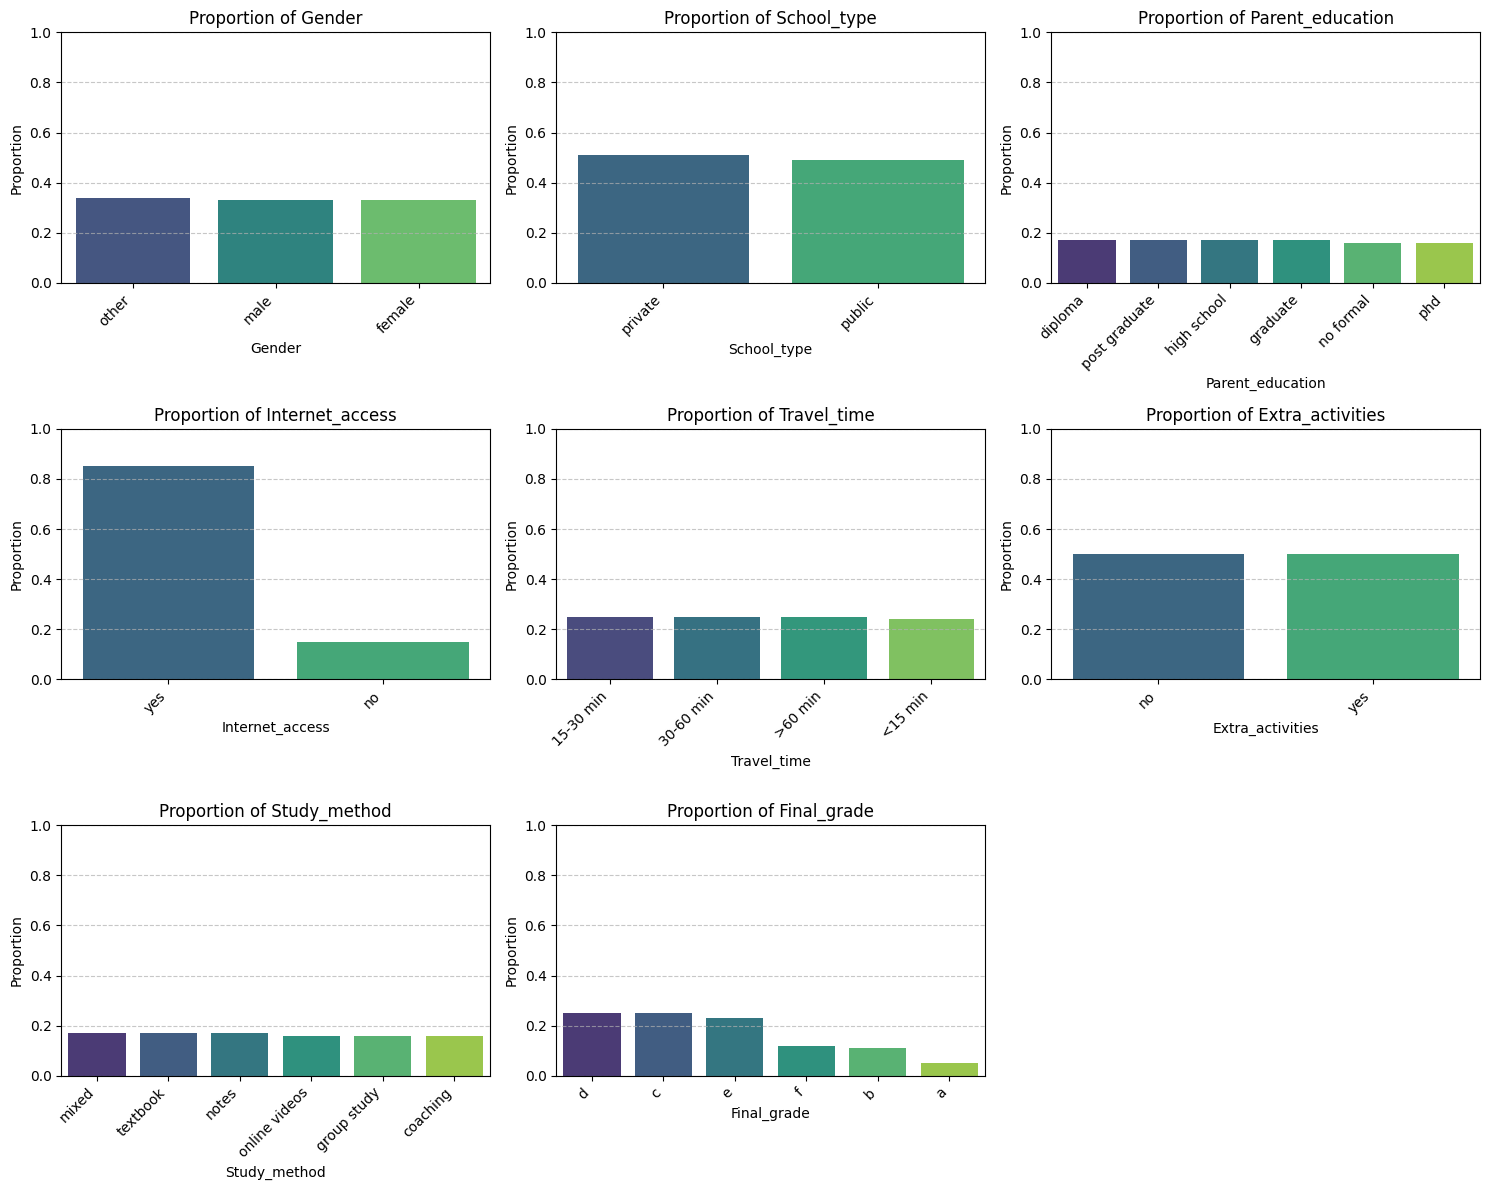

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt

print("\n--- Univariate Analysis for Categorical Variables ---")
num_rows = 3
num_cols_per_row = 3

categorical_cols = ['gender', 'school_type','parent_education','internet_access',
               'travel_time','extra_activities', 'study_method', 'final_grade']

plt.figure(figsize=(num_cols_per_row * 5, num_rows * 4))

for i, col in enumerate(categorical_cols):
    print(f"\nValue Counts for '{col}':")
    print(data[col].value_counts())
    print(f"\nNormalized Value Counts for '{col}' (Proportions):")
    norm_counts = data[col].value_counts(normalize=True).round(2)
    print(norm_counts)

    plt.subplot(num_rows, num_cols_per_row, i + 1)
    # Use barplot for proportions, mapping index (categories) to x and values (proportions) to y
    sns.barplot(x=norm_counts.index, y=norm_counts.values, palette='viridis', hue=norm_counts.index, legend=False)
    plt.title(f'Proportion of {col.capitalize()}')
    plt.xlabel(col.capitalize())
    plt.ylabel('Proportion')
    plt.ylim(0, 1) # Ensure y-axis is between 0 and 1 for proportions
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()


###Describe Quantitative Variables

In [61]:
print("Descriptive Statistics:")
print(data.describe())

Descriptive Statistics:
         student_id           age  study_hours  attendance_percentage  \
count  15000.000000  15000.000000  15000.00000           15000.000000   
mean    7500.500000     16.476400      4.25936              74.991760   
std     4330.271354      1.704475      2.17244              14.401139   
min        1.000000     14.000000      0.50000              50.000000   
25%     3750.750000     15.000000      2.40000              62.600000   
50%     7500.500000     16.000000      4.30000              75.000000   
75%    11250.250000     18.000000      6.10000              87.400000   
max    15000.000000     19.000000      8.00000             100.000000   

         math_score  science_score  english_score  overall_score  
count  15000.000000   15000.000000   15000.000000   15000.000000  
mean      63.774553      63.751227      63.709227      64.015500  
std       20.919958      21.027675      20.860201      18.977811  
min        0.000000       0.000000       0.000000 

###Check if the calculated overall score matches the existing overall_score

In [62]:
data['calculated_overall_score'] = data[['math_score', 'english_score', 'science_score']].mean(axis=1)

# Check if the calculated overall score matches the existing overall score
differences = data[data['calculated_overall_score'].round(1) != data['overall_score'].round(1)].copy()

if differences.empty:
    print("The 'overall_score' perfectly matches the average of 'math_score', 'english_score', and 'science_score' for all students.")
else:
    print(f"Found {len(differences)} discrepancies where 'overall_score' does not match the average of math, English, and science scores.\n")
    display(differences[['student_id', 'math_score', 'english_score', 'science_score', 'calculated_overall_score', 'overall_score']].head())

Found 14873 discrepancies where 'overall_score' does not match the average of math, English, and science scores.



,student_id,math_score,english_score,science_score,calculated_overall_score,overall_score
0,1,42.7,57.0,55.4,51.700000,53.1
1,2,57.6,64.8,68.8,63.733333,61.3
2,3,84.8,79.2,95.0,86.333333,89.6
3,4,44.4,54.7,27.5,42.200000,41.6
4,5,8.9,30.0,32.7,23.866667,25.4


In [63]:
if not differences.empty:
    # Ensure score_difference is calculated if it wasn't already (e.g., if the user re-runs this cell without running the previous one)
    if 'score_difference' not in differences.columns:
        differences['score_difference'] = differences['overall_score'] - differences['calculated_overall_score']
    display(differences[['student_id', 'math_score', 'english_score', 'science_score', 'overall_score', 'calculated_overall_score', 'score_difference']].head())
else:
    print("No differences were found, so there's no table to display.")

,student_id,math_score,english_score,science_score,overall_score,calculated_overall_score,score_difference
0,1,42.7,57.0,55.4,53.1,51.700000,1.400000
1,2,57.6,64.8,68.8,61.3,63.733333,-2.433333
2,3,84.8,79.2,95.0,89.6,86.333333,3.266667
3,4,44.4,54.7,27.5,41.6,42.200000,-0.600000
4,5,8.9,30.0,32.7,25.4,23.866667,1.533333


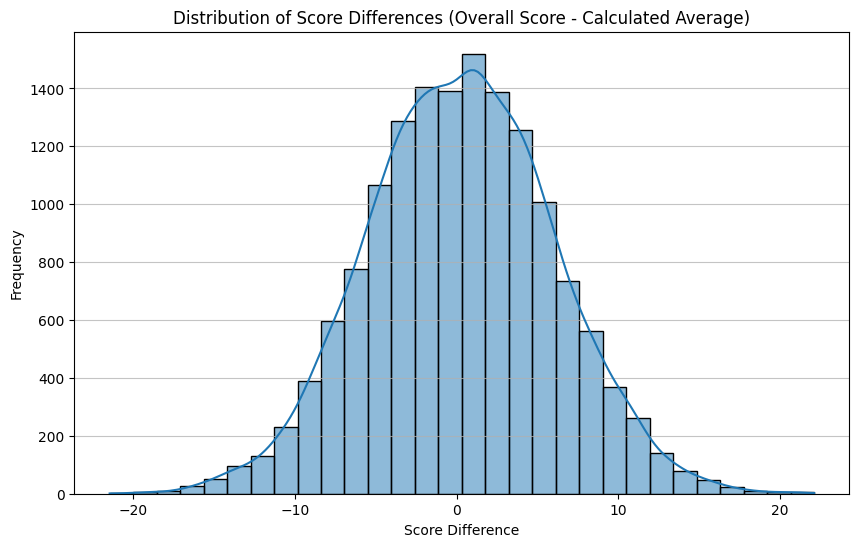

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns

if 'score_difference' in differences.columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(differences['score_difference'], kde=True, bins=30)
    plt.title('Distribution of Score Differences (Overall Score - Calculated Average)')
    plt.xlabel('Score Difference')
    plt.ylabel('Frequency')
    plt.grid(axis='y', alpha=0.75)
    plt.show()
else:
    print("The 'score_difference' column was not found. Please ensure it has been calculated.")

###Univariate Analysis of Numerical Variables


--- Univariate Analysis for Numerical Columns ---

Descriptive Statistics for 'age':
                age
count  15000.000000
mean      16.476400
std        1.704475
min       14.000000
25%       15.000000
50%       16.000000
75%       18.000000
max       19.000000


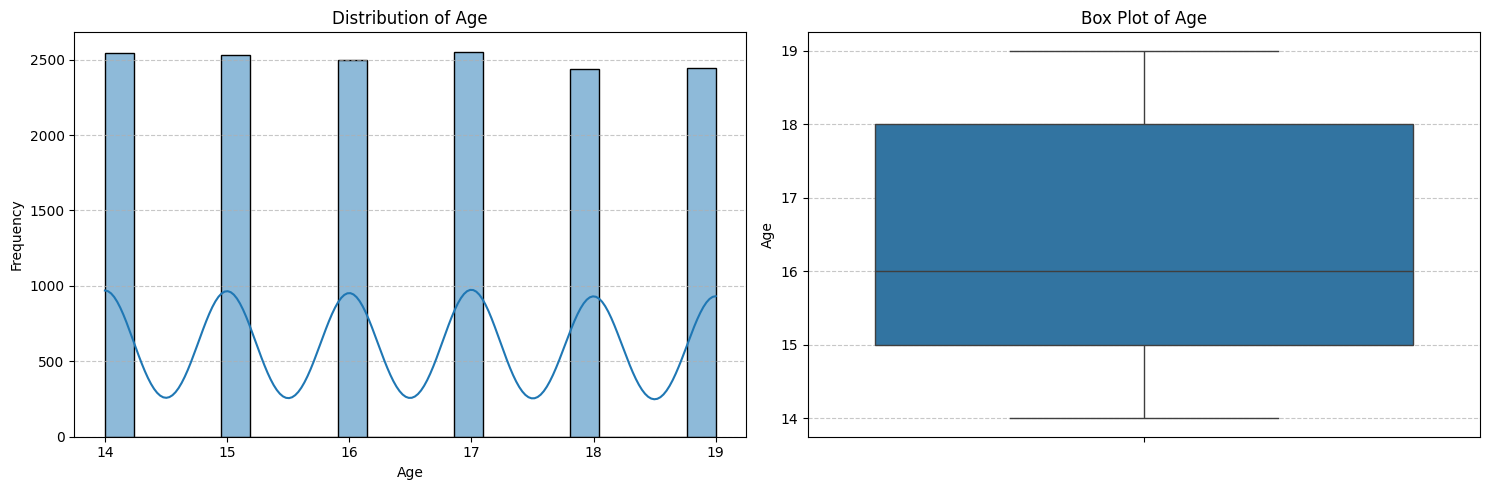


Descriptive Statistics for 'study_hours':
       study_hours
count  15000.00000
mean       4.25936
std        2.17244
min        0.50000
25%        2.40000
50%        4.30000
75%        6.10000
max        8.00000


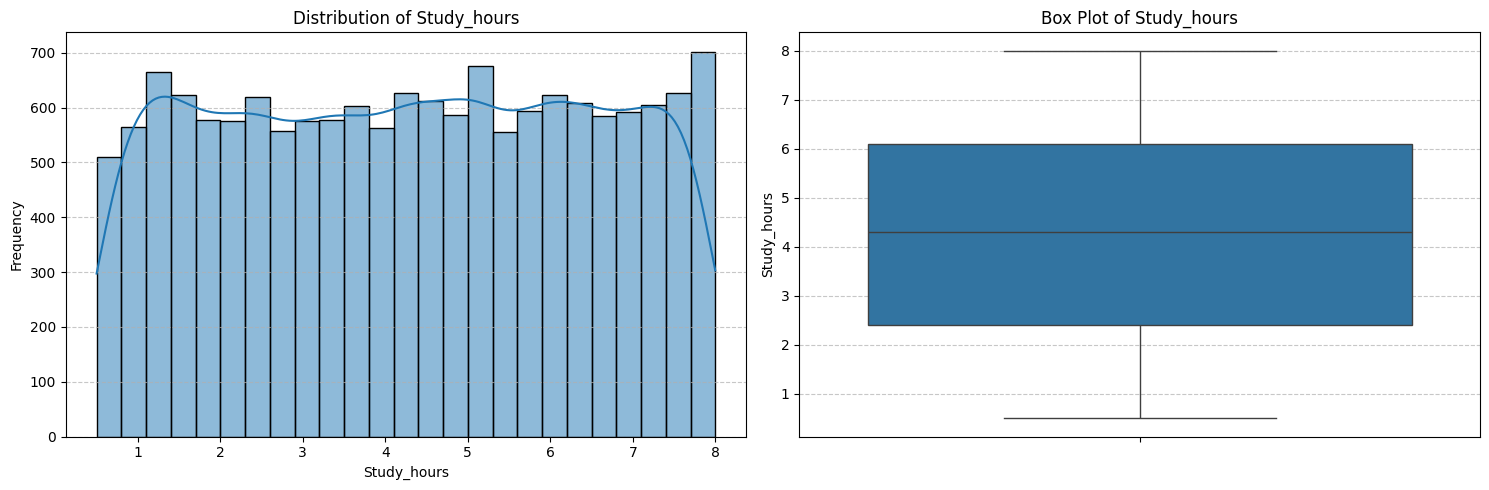


Descriptive Statistics for 'attendance_percentage':
       attendance_percentage
count           15000.000000
mean               74.991760
std                14.401139
min                50.000000
25%                62.600000
50%                75.000000
75%                87.400000
max               100.000000


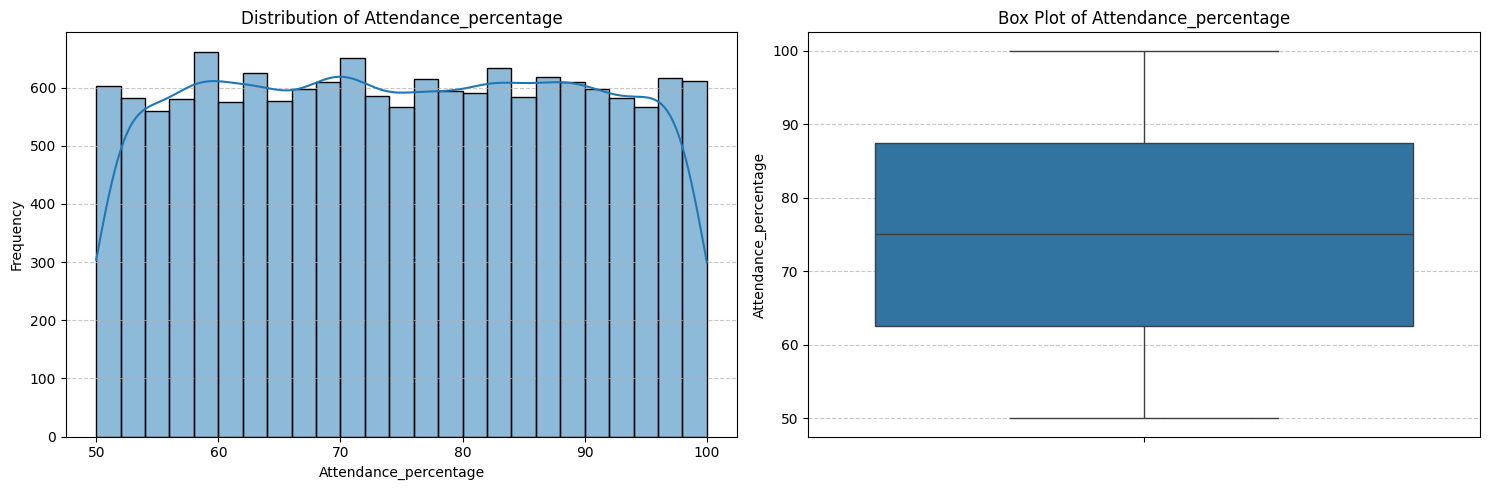


Descriptive Statistics for 'math_score':
         math_score
count  15000.000000
mean      63.774553
std       20.919958
min        0.000000
25%       48.200000
50%       64.100000
75%       80.100000
max      100.000000


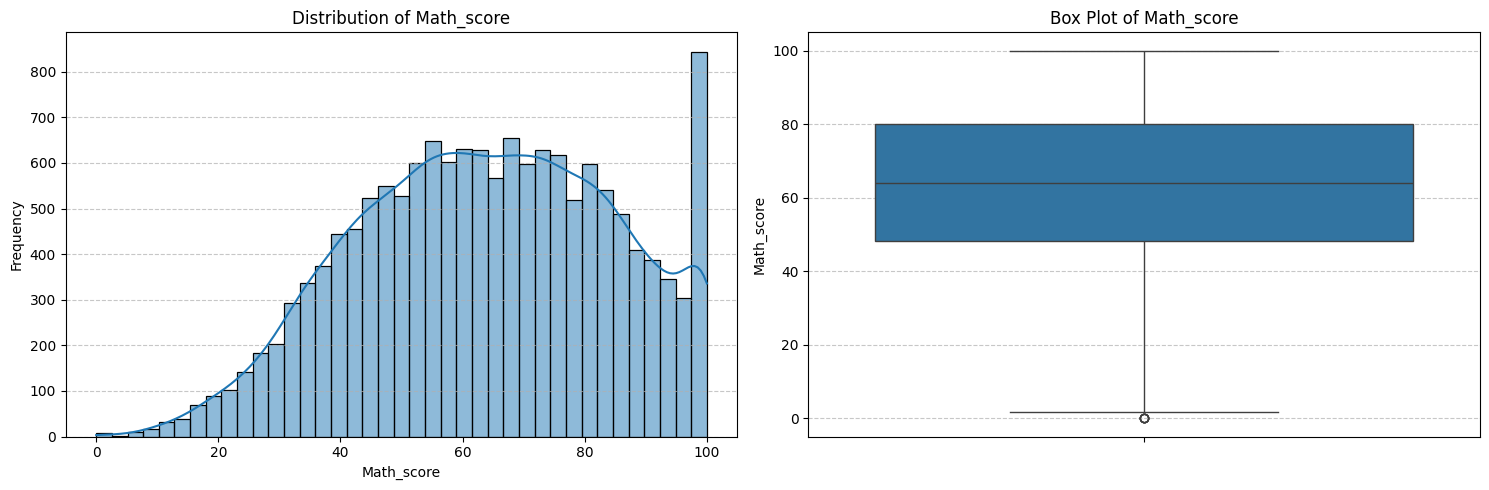


Descriptive Statistics for 'science_score':
       science_score
count   15000.000000
mean       63.751227
std        21.027675
min         0.000000
25%        48.100000
50%        64.000000
75%        80.100000
max       100.000000


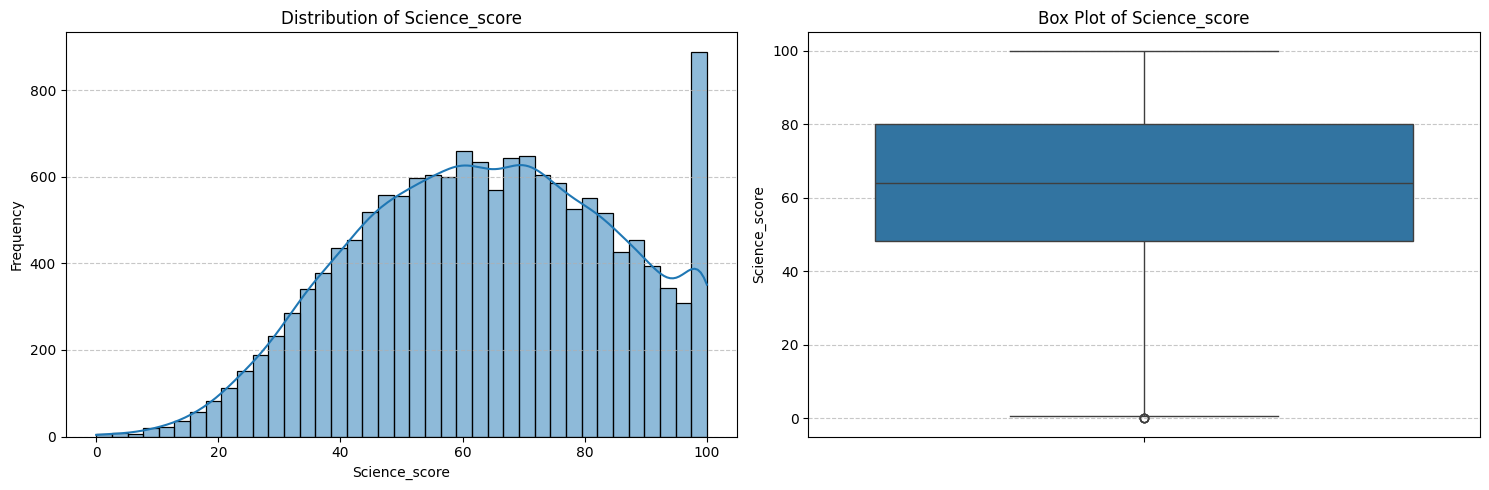


Descriptive Statistics for 'english_score':
       english_score
count   15000.000000
mean       63.709227
std        20.860201
min         0.000000
25%        48.300000
50%        64.200000
75%        80.000000
max       100.000000


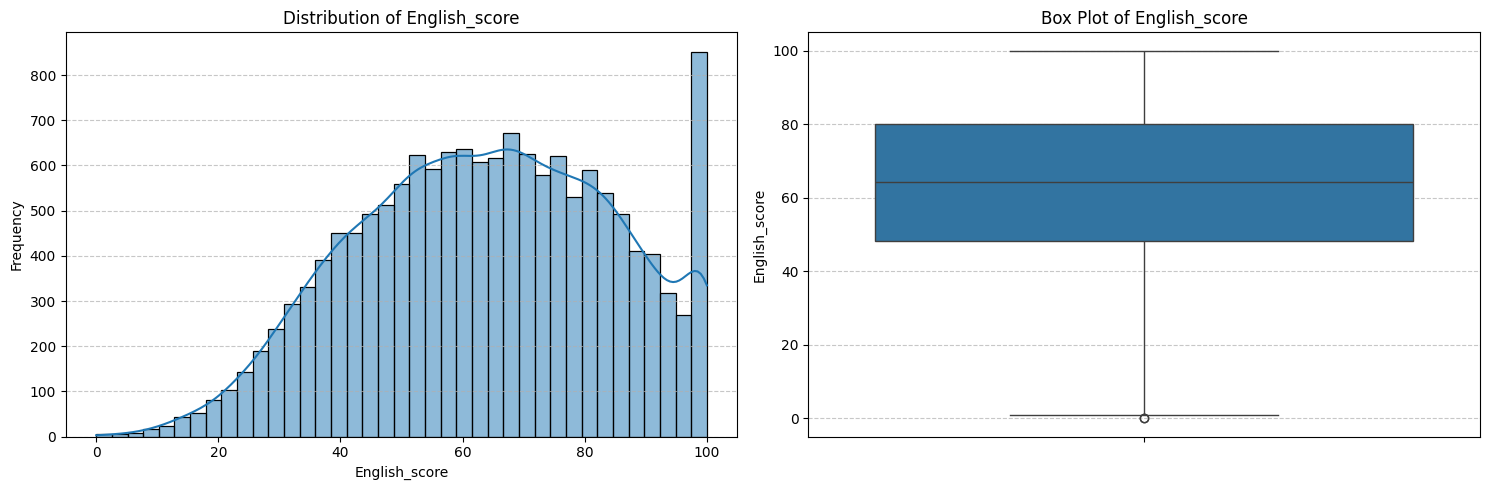


Descriptive Statistics for 'overall_score':
       overall_score
count   15000.000000
mean       64.015500
std        18.977811
min        14.500000
25%        49.000000
50%        64.300000
75%        79.100000
max       100.000000


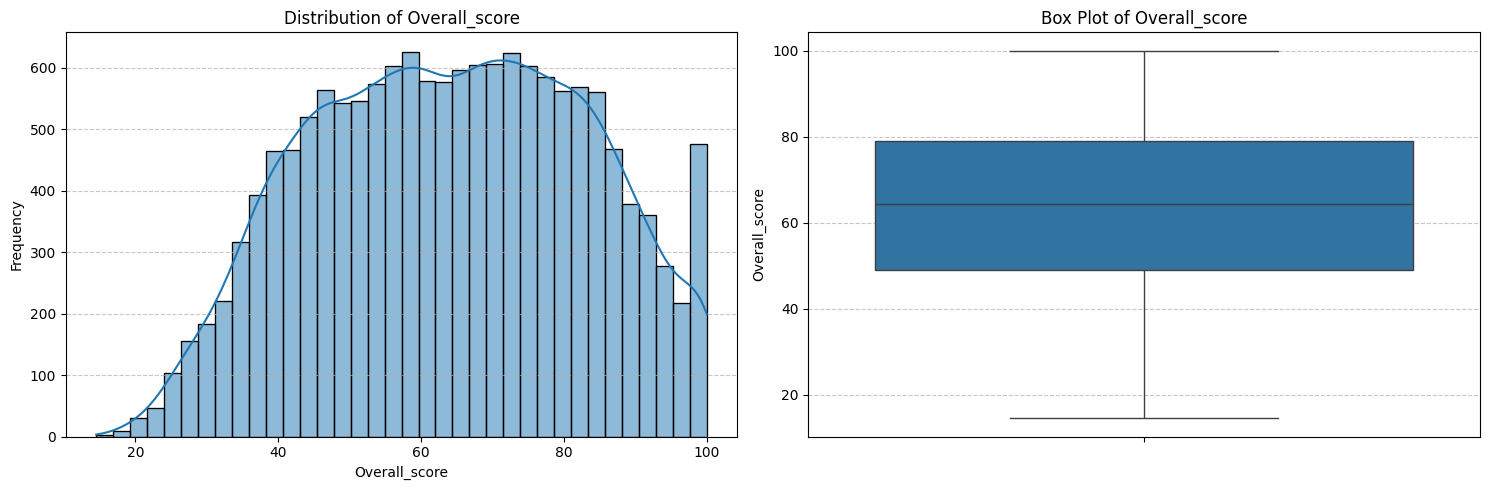

In [65]:
numerical_cols = ['age','study_hours','attendance_percentage','math_score',
               'science_score', 'english_score','overall_score']

print("\n--- Univariate Analysis for Numerical Columns ---")

for col in numerical_cols:
    print(f"\nDescriptive Statistics for '{col}':")
    print(data[[col]].describe())

    # Create a figure with two subplots (side-by-side) for histogram and box plot
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))

    # Histogram
    sns.histplot(data[col].dropna(), kde=True, ax=axes[0])
    axes[0].set_title(f'Distribution of {col.capitalize()}')
    axes[0].set_xlabel(col.capitalize())
    axes[0].set_ylabel('Frequency')
    axes[0].grid(axis='y', linestyle='--', alpha=0.7)

    # Box Plot
    sns.boxplot(y=data[col], ax=axes[1])
    axes[1].set_title(f'Box Plot of {col.capitalize()}')
    axes[1].set_ylabel(col.capitalize())
    axes[1].grid(axis='y', linestyle='--', alpha=0.7)

    plt.tight_layout()
    plt.show()

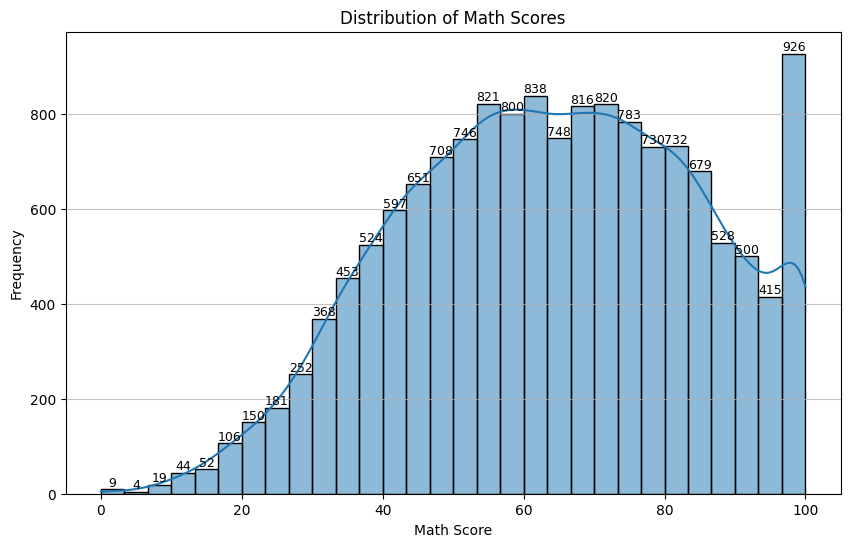

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
ax = sns.histplot(data['math_score'], kde=True, bins=30)
plt.title('Distribution of Math Scores')
plt.xlabel('Math Score')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)

# Add counts on top of the bars
for patch in ax.patches:
    x = patch.get_x() + patch.get_width() / 2
    y = patch.get_height()
    if y > 0: # Only annotate bars with count > 0
        ax.text(x, y, f'{int(y)}', ha='center', va='bottom', fontsize=9, color='black')

plt.show()

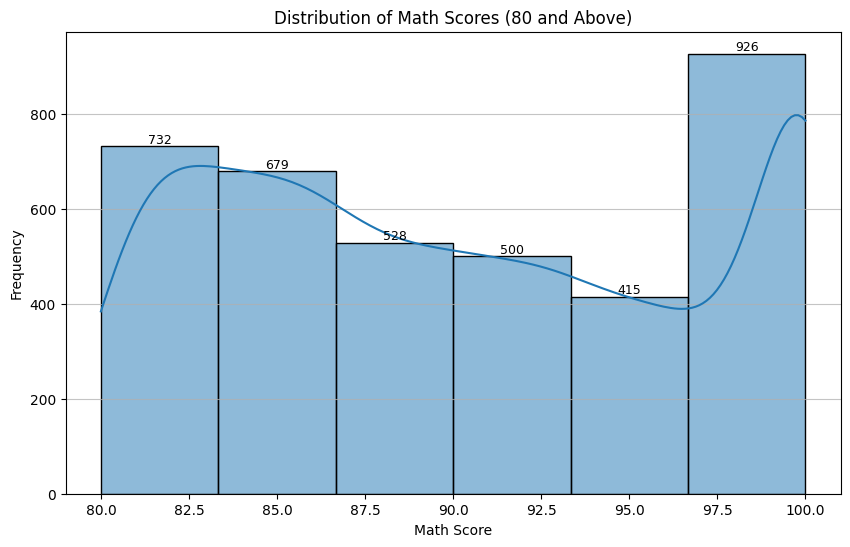

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter the DataFrame to get students with math scores 90 and above
math_scores_80_and_above = data[data['math_score'] >= 80]['math_score']

# Create the histogram
plt.figure(figsize=(10, 6))
ax = sns.histplot(math_scores_80_and_above, kde=True, bins=6)
plt.title('Distribution of Math Scores (80 and Above)')
plt.xlabel('Math Score')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)

# Add counts on top of the bars
for patch in ax.patches:
    x = patch.get_x() + patch.get_width() / 2
    y = patch.get_height()
    if y > 0: # Only annotate bars with count > 0
        ax.text(x, y, f'{int(y)}', ha='center', va='bottom', fontsize=9, color='black')

plt.show()

###Determine the Relationship Between the Overall_Scores and Grades

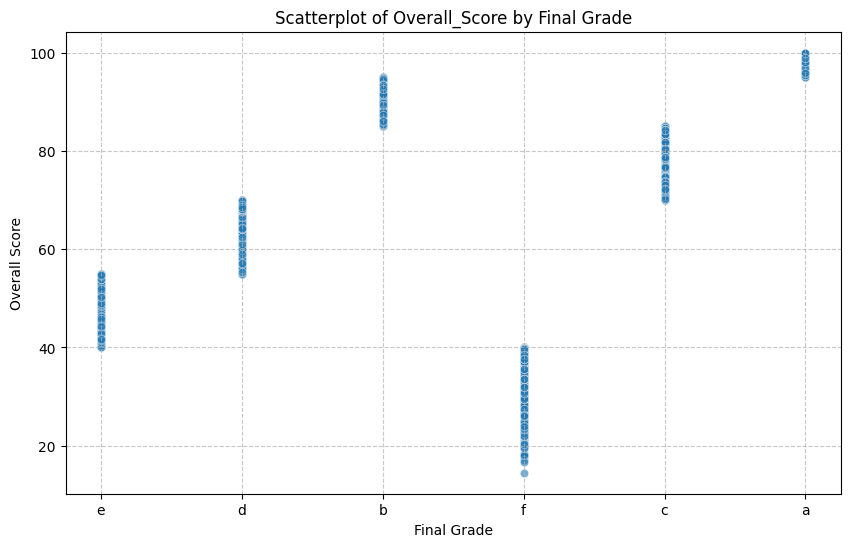

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='final_grade', y='overall_score', alpha=0.6)
plt.title('Scatterplot of Overall_Score by Final Grade')
plt.xlabel('Final Grade')
plt.ylabel('Overall Score')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

### Distribution of Age Versus Extra-Activities

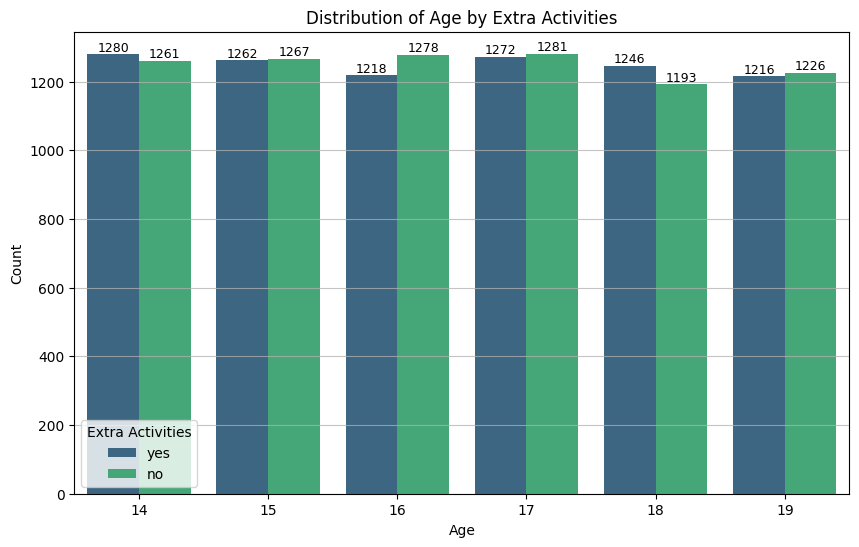

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
ax = sns.countplot(data=data, x='age', hue='extra_activities', palette='viridis')
plt.title('Distribution of Age by Extra Activities')
plt.xlabel('Age')
plt.ylabel('Count')
plt.grid(axis='y', alpha=0.75)
plt.legend(title='Extra Activities')
# Add counts on top of the bars
for patch in ax.patches:
    x = patch.get_x() + patch.get_width() / 2
    y = patch.get_height()
    if y > 0: # Only annotate bars with count > 0
        ax.text(x, y, f'{int(y)}', ha='center', va='bottom', fontsize=9, color='black')
plt.show()

###Distribution of Overall Score Versus Age

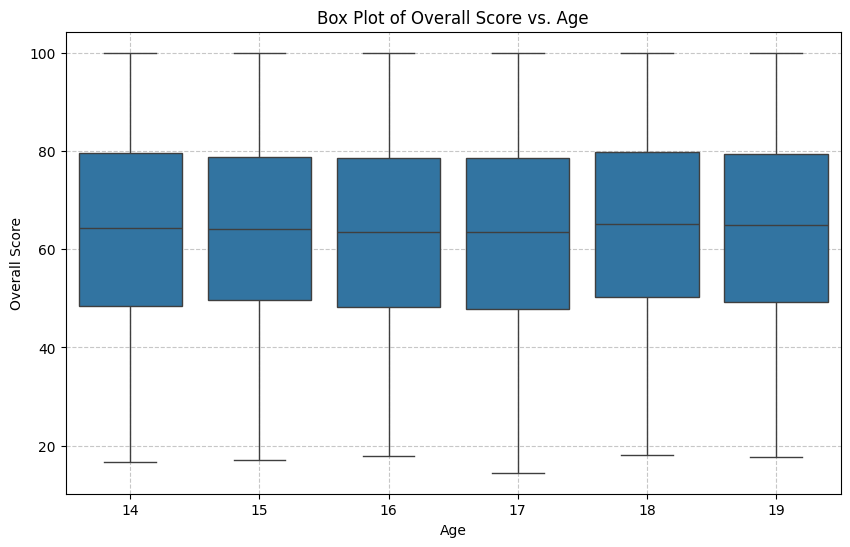

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='age', y='overall_score')
plt.title('Box Plot of Overall Score vs. Age')
plt.xlabel('Age')
plt.ylabel('Overall Score')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

###Summary
The distribution of students across any given category did not vary.  Most students, however, had internet.
This is highly suspect. Approximately, the same number of students had parents with no formal education as had parents with phds.  What population does this sample represent?
I looked more closely at the description of the dataset on Kaggle. It is synthetically generated.  Ugh.


In [71]:
from google.colab import drive
drive.flush_and_unmount()